In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ipl = pd.read_csv('ipl_2022_dataset.csv')
ipl.head(5)

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
#lets check the statistical info of the data
ipl.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,237.000000,237.000000
mean,316.000000,3.695781,480.451477
std,182.875641,4.238092,550.951945
min,0.000000,0.200000,26.000000
25%,158.000000,0.400000,52.000000
50%,316.000000,1.900000,247.000000
75%,474.000000,6.500000,845.000000
max,632.000000,17.000000,2210.000000


In [8]:
ipl.shape

(633, 8)

In [6]:
#Lets find the number Nulls in the dataset
ipl.isnull().sum()

Unnamed: 0           0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ KB


In [10]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [11]:
ipl.drop('Unnamed: 0',axis =1,inplace=True)

In [12]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [16]:
ipl[ipl['COST IN ₹ (CR.)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [17]:
#To fill the nan values with zeroes so all the null values replac ed with the '0'
ipl['COST IN ₹ (CR.)']=ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)']=ipl['Cost IN $ (000)'].fillna(0)

In [20]:
ipl.isnull().sum()
#Boom , we removed the null values form the 2 columns.

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [21]:
#:Lets Remove the nulls from the 2021 Squad column , by replacing text with'Not Participated'
#Here i am using ".fillna('text')" function to replace or fill.
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [22]:
ipl.isnull().sum()
#Again boom , all the null values are replaced , with zeroes and text.

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [23]:
#We are going to add another column 'sold or unsold' by slicing the dataframe.
teams= ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [25]:
#here i am adding a new column 'status', by replacing the above variables 'teams' with text "sold"
ipl['status']=ipl['Team'].replace(teams, 'sold')


In [26]:
#here we have the output.The new column status is added succesfully
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [28]:
#Check the duplicated players in th dataset.
ipl[ipl['Player'].duplicated(keep=False)]

#see the output, we have players , with same names.

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [32]:
#Find how many players not participated in 2022 ipl auction?
ipl.shape[0]

633

In [34]:
#How many types of players participated?
#I used ".value_counts()" to get count of different tyoes of olat=yers form the TYPE column.
#".reset_index()"
types = ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

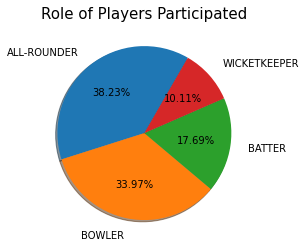

In [39]:
#Create a pie chart based on participation of different types of players.
plt.pie(types.values,labels=types.index, labeldistance=1.2,autopct='%1.2f%%', shadow=True,startangle=60)
plt.title('Role of Players Participated', fontsize =15)
plt.plot()

C:\Users\MY PC\Videos\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

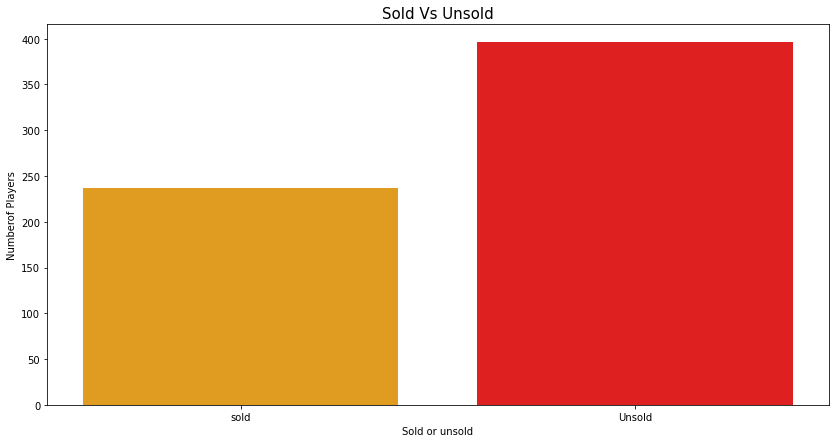

In [42]:
#Bar graph of the Players Sild & Unsold
plt.figure(figsize=(14,7))
fig = sns.countplot(ipl['status'],palette=['Orange', 'red'])
plt.xlabel('Sold or unsold')
plt.ylabel('Numberof Players')
plt.title('Sold Vs Unsold',fontsize = 15)
plt.plot()

In [43]:
#print sold and unsold values
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

C:\Users\MY PC\Videos\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

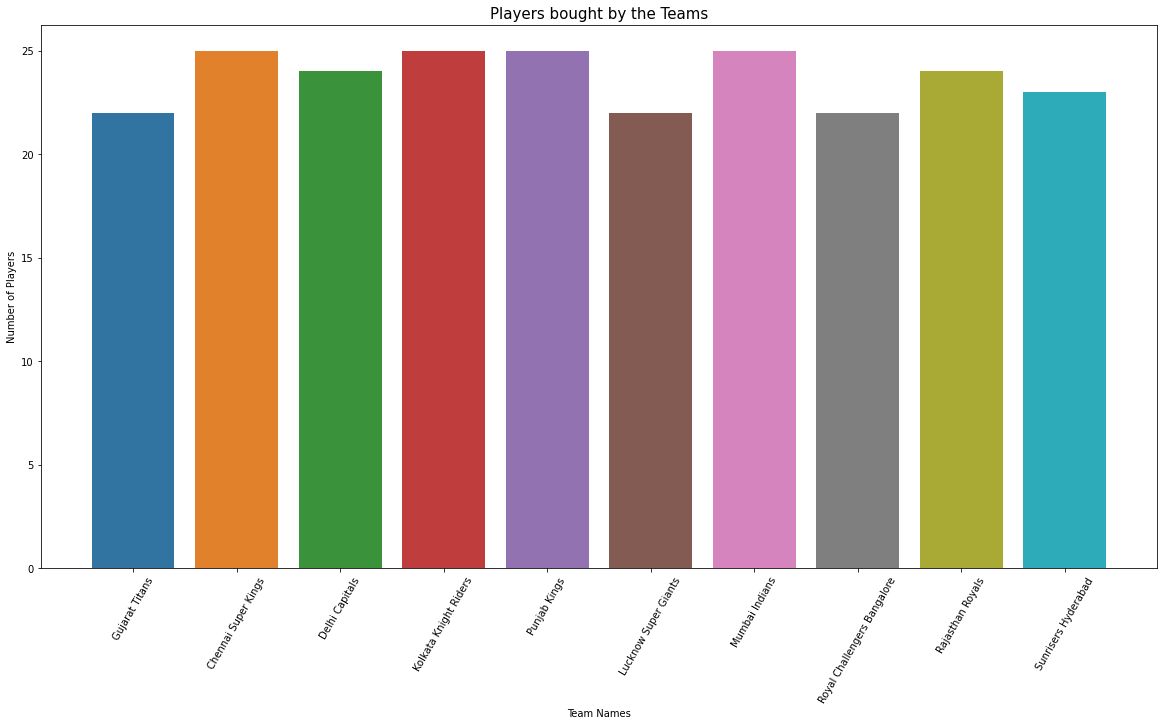

In [44]:
#Total no:of players bought by the teams
plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players bought by the Teams',fontsize=15)
plt.xticks(rotation=60)
plt.plot()

In [58]:
ipl.groupby('Team')['status'].count()

Team
Chennai Super Kings             25
Delhi Capitals                  24
Gujarat Titans                  22
Kolkata Knight Riders           25
Lucknow Super Giants            22
Mumbai Indians                  25
Punjab Kings                    25
Rajasthan Royals                24
Royal Challengers Bangalore     22
Sunrisers Hyderabad             23
Unsold                         396
Name: status, dtype: int64

In [59]:
#Create 3 more new columns called retention from base price
ipl['retention'] = ipl['Base Price']

In [60]:
#replace the values like 2 cr, 40lakh etc from auction
ipl['retention'].replace(['2 Cr','40 Lakh','20 Lakh','1 Cr','75 Lakh',
                         '50 Lakh','30 Lakh','1.5 Cr'],'From Auction',inplace = True)

In [69]:
#Treating Base Price
ipl['Base Price'].replace('Draft Pick',0,inplace=True)

In [74]:
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price']= ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [79]:
ipl['base_price'].replace['retained',0,inplce=True]

SyntaxError: invalid syntax (Temp/ipykernel_7884/2668843361.py, line 1)

In [81]:
#Total players retained and bought
ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

C:\Users\MY PC\Videos\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of player')

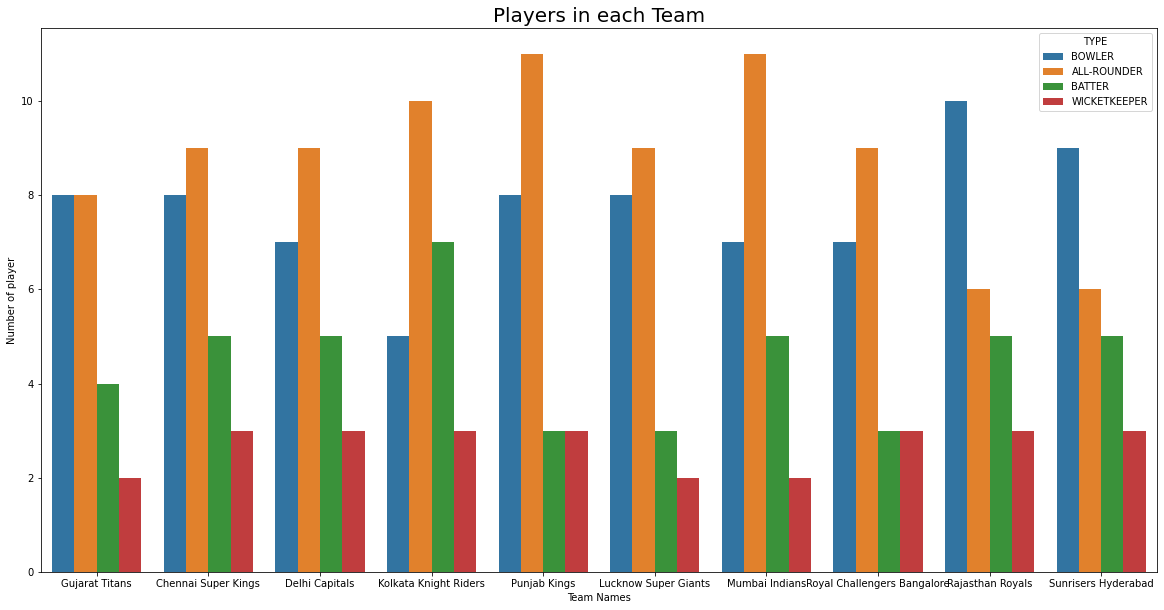

In [87]:
#bar graph of Players in each team according to their types('Batter', 'Bowler','All rounder','Wicket Keeper')
plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Players in each Team',fontsize = 20)
plt.xlabel('Team Names')
plt.ylabel('Number of player')


In [89]:
#Highest amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [92]:
# Top 5 player retained at the maximum price
ipl[ipl['retention']=='Retained'].sort_values(by ='COST IN ₹ (CR.)',ascending = False).head(5)
#jadeja is the high retained price in ipl 2022

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,Retained
47,Rishabh Pant,Retained,WICKETKEEPER,16.0,2080.0,DC,Delhi Capitals,sold,Retained,Retained,Retained
143,Rohit Sharma,Retained,BATTER,16.0,2080.0,MI,Mumbai Indians,sold,Retained,Retained,Retained
168,Virat Kohli,Retained,BATTER,15.0,1950.0,RCB,Royal Challengers Bangalore,sold,Retained,Retained,Retained
214,Kane Williamson,Retained,BATTER,14.0,1820.0,SRH,Sunrisers Hyderabad,sold,Retained,Retained,Retained


In [94]:
#Top 5 Bowlers
ipl[(ipl['retention']=='From Auction') &(ipl['TYPE']=='BOWLER')].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,Lakh,20


In [95]:
# Top 5 Wicketkeepers
ipl[(ipl['retention']=='From Auction') &(ipl['TYPE']=='WICKETKEEPER')].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,sold,From Auction,Cr,2
215,Nicholas Pooran,1.5 Cr,WICKETKEEPER,10.75,1397.5,PBKS,Sunrisers Hyderabad,sold,From Auction,Cr,1.5
127,Quinton De Kock,2 Cr,WICKETKEEPER,6.75,877.5,MI,Lucknow Super Giants,sold,From Auction,Cr,2
26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,877.5,CSK,Chennai Super Kings,sold,From Auction,Cr,2
101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,877.5,SRH,Punjab Kings,sold,From Auction,Cr,1.5


In [97]:
#List of the players , who were unsoldin the 2022 IPL season.
#I reanmed the '2021 Squad' column as 'Prev_team'
ipl = ipl.rename(columns={'2021 Squad':'Prev_team'})

In [98]:
#Create a new variable called  unsold_players, who are "not_participated" and "unsold".
unsold_players=ipl[(ipl.Prev_team!='Not Participated')&(ipl.Team=='Unsold')][['Player','Prev_team']]

In [99]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr